## CS585: Natural Language Processing
### Neural Networks II

<br><br>
#### Illinois Institute of Technology  
#### Aron Culotta

<br><br><br><br><br>

## Recall Logistic Regression

Probability of instance $\vec{x}_i \in \mathbf{R}^d$ having class label $y_i \in \{-1, 1\}$: 
$$
p(y_i|\vec{x}_i) =  \frac{1}{1 + e^{-y_i \vec{x}_i \cdot \vec{\theta}}}
$$
where $\vec{\theta} \in \mathbf{R}^d$ is a $d$-dimensional parameter vector.


Using our gradient descent recipe, we picked as an error function  
the <u>negative log likelihood</u> based on training data $D = \{(\vec{x}_1, y_1) \ldots (\vec{x}_n, y_n) \}$:

$$E(D,\vec{\theta}) = - \ln \prod_{i=1}^n  p(y_i|\vec{x}_i) = -\sum_i \ln p(y_i|\vec{x}_i)$$

<br>
We computed the partial gradient $\frac{\partial E(D,f)}{\partial \theta_j}$ w.r.t. one parameter $\theta_j$ to derive the update rule:

$$
\vec{\theta}_j^{t+1} \leftarrow \vec{\theta}_j^{t} + \eta \sum_i y_i x_{ij}(1-p(y_i|\vec{x}_i))
$$





## Neural Networks

A metaphor for describing computation.

<u> Logistic Regression as a Neural Network </u>

![nn](../l15/figs/nn.png)

## Multi-layer Neural Network

![nn2](../l15/figs/nn2.png)

Introduce $m$ <u> hidden nodes</u> $\vec{h} = \{h_1 \ldots h_m\}$.
- Like $m$ different classifiers
  - Each with own set of parameters $\{\{\theta_{11} \ldots \theta_{d1}\} \ldots \{\theta_{1m} \ldots \theta_{dm}\}\}$
- But, no associated labeled data for those classifiers.

Also introduce a classifier to map from hidden values $\vec{h}$ to label $y$
- with parameters $\vec{\lambda} = \{\lambda_1 \ldots \lambda_h\}$

<u>Conceptually</u>
- Identify $m$ different transformations of the input
- Combine those $m$ transformations into a prediction
- Allows <u> nonlinear</u> prediction functions


## XOR problem

| $x_{i1}$ | $x_{i2}$ | $y_i$ |
|----------|----------|-------|
| 0        |     0    |  0    |
| 0        |     1    |  1    |
| 1        |     0    |  1    |
| 1        |     1    |  1    |


![xor](../l15/figs/xor.png)

![xor2](../l15/figs/xor2.png)

![xor3](../l15/figs/xor3.png)

## Learning in neural nets

Consider the three layer neural network.  
How can we learn the parameters $\vec{\theta}$ and $\vec{\lambda}$?



#### Stochastic gradient descent

Update parameters separately for each example (or small batch of examples):

$\vec{\lambda}$ parameters are just updated like in logistic regression, replacing $h_j$ for feature $x_j$:

$$
\lambda_j^{t+1} \leftarrow \lambda_j^t + \eta (1-p(y \mid \vec{h}; \vec{\lambda}))y h_j
$$

To compute updates for $\theta$, we need to "assign blame" to each hidden unit proportionally:

$$
\theta_{ij}^{t+1} \leftarrow \theta_{ij}^t + \eta( \lambda_j(1 - p(y \mid \vec{h} ; \vec{\lambda}))) y x_i
$$
- $\theta_{ij}$ is the weight connecting input feature $i$ to hidden node $j$
- $\lambda_j$ weights the influence of hidden node $h_j$ on the final classification $y$
- $x_i$ indicates the influence of the $i$th input feature on hidden node $h_j$
 - In picuture below, this is $x_{1i}$, but we've dropped the example index for simplicity.

![nn2](../l15/figs/nn2.png)


### Error functions

The actual update will depend on the choice of:

1. **Error Function**
  - What is the error function optimized by gradient descent?

2. **Activation function**
  - How are inputs converted to outputs
  - May differ by layer

## Error Functions

Given true label $y_i$ and predicted output $\hat{y}_i$, we can compute different error functions to train the parameters of the neural net:

- Squared Error: 
$$\sum_i (y_i - \hat{y}_i)^2 $$

- Cross-entropy
$$ \sum_i y_i \ln \hat{y}_i + (1-y_i)\ln(1-\hat{y}_i)$$

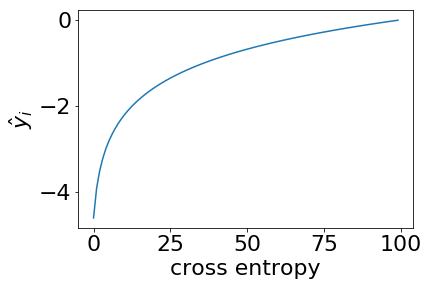

In [122]:
import math
def ce(yi, yhati):
    return yi * math.log(yhati) + (1-yi) * math.log(1-yhati)
    
ce(1, .99)

yhatis =  (np.arange(100) + 1) / 101
plt.figure()
plt.plot([ce(1, yhati) for yhati in yhatis])
plt.ylabel('$\hat{y}_i$')
plt.xlabel('cross entropy')
plt.show()

## Activation functions

Many choices:

- Sigmoid:
$$ f(t) = \frac{1}{1 + e^{-t}} $$

- Rectified linear function
$$ f(t) = \mathrm{max}(0, t)$$

- Softmax
$$ f(t_i) = \frac{e^{t_i}}{\sum_j e^{t_j}}$$


## Example of XOR and Neural Nets

In [123]:
import numpy as np

def create_xor_data(n):
    np.random.seed(1234)
    ni = int(n / 4)
    d00 = [[0,0] + np.random.randn(2)/1e2 for i in range(ni)]
    d01 = [[0,1] + np.random.randn(2)/1e2 for i in range(ni)]
    d10 = [[1,0] + np.random.randn(2)/1e2 for i in range(ni)]
    d11 = [[1,1] + np.random.randn(2)/1e2 for i in range(ni)]
    y = [0] * ni + [1] * ni * 2 + [0] * ni
    return np.vstack([d00, d01, d10, d11]), np.array(y)

X, y = create_xor_data(12)
print(X)
print(y)



[[  4.71435164e-03  -1.19097569e-02]
 [  1.43270697e-02  -3.12651896e-03]
 [ -7.20588733e-03   8.87162940e-03]
 [  8.59588414e-03   9.93634765e-01]
 [  1.56963721e-04   9.77573150e-01]
 [  1.15003572e-02   1.00991946e+00]
 [  1.00953324e+00  -2.02125482e-02]
 [  9.96659226e-01   2.11836468e-05]
 [  1.00405453e+00   2.89091941e-03]
 [  1.01321158e+00   9.84530944e-01]
 [  9.97973537e-01   9.93440307e-01]
 [  1.00193421e+00   1.00553439e+00]]
[0 0 0 1 1 1 1 1 1 0 0 0]


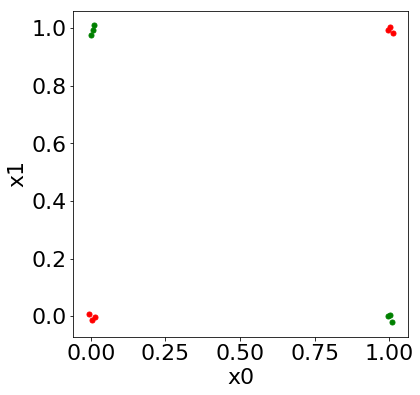

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', size=22)


def plot_data(X, y):
    for xi, yi in zip(X, y):
        plt.plot(xi[0], xi[1], marker='.', ms=10, color='g' if yi == 1 else 'r')
    plt.xlabel('x0')
    plt.ylabel('x1')


plt.figure(figsize=(6,6))
plot_data(X, y)
plt.show()
    

In [125]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X, y)
print('coef=', lr.coef_)
print('intercept=', lr.intercept_)

coef= [[ 0.00178555 -0.0036723 ]]
intercept= [ 0.00068779]


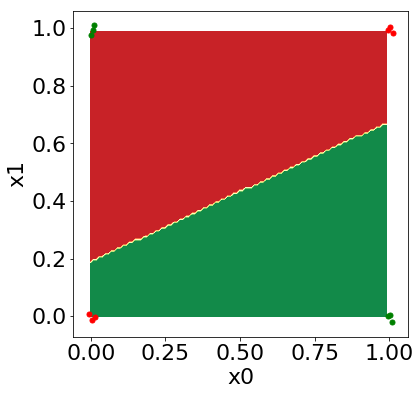

In [126]:
def plot_decision_surface(clf):
    xx0, xx1 = np.meshgrid(np.arange(0, 1, .01),
    np.arange(0, 1, .01))
    Z = clf.predict(np.c_[xx0.ravel(), xx1.ravel()])
    Z = Z.reshape(xx0.shape)
    cs = plt.contourf(xx0, xx1, Z, cmap=plt.cm.RdYlGn)


plt.figure(figsize=(6,6))
plot_decision_surface(lr)
plot_data(X, y)
plt.show()

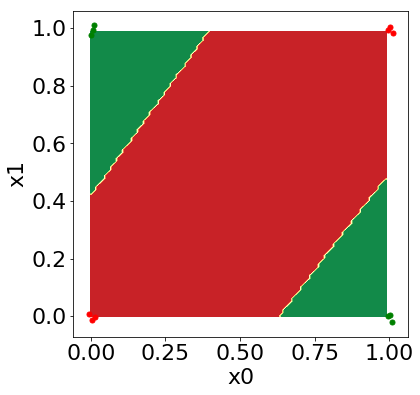

In [127]:
## Neural Net
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=[2],
                    activation='logistic',
                    solver='lbfgs',
                    random_state=1234)
mlp.fit(X, y)


plt.figure(figsize=(6,6))
plot_decision_surface(mlp)
plot_data(X, y)
plt.show()

In [128]:
# input -> hidden layer weights.
mlp.coefs_[0]
# first column are parameters used to compute first hidden unit
# second column are used to compute second hidden unit

array([[-8.64895579, -9.28061078],
       [ 6.41106562,  6.43071286]])

In [91]:
# hidden -> output layer weights
mlp.coefs_[1]

array([[-17.14884548],
       [ 17.57118547]])

In [57]:
mlp.intercepts_

[array([ 5.39673997, -2.67291451]), array([ 8.18943824])]

In [129]:
from math import exp

def f(x, theta):
    return np.dot(x.T, theta)

def logistic(x, theta):
    return 1 / (1 + exp(-f(x, theta)))

h0 = np.array([mlp.coefs_[0][0][0], mlp.coefs_[0][1][0], mlp.intercepts_[0][0]])
h1 = np.array([mlp.coefs_[0][0][1], mlp.coefs_[0][1][1], mlp.intercepts_[0][1]])
o1 = np.array([mlp.coefs_[1][0], mlp.coefs_[1][1], mlp.intercepts_[1][0]])

In [134]:
def projection(x, h0, h1):
    h0x = logistic(x, h0)
    h1x = logistic(x, h1)
    return h0x, h1x

projection(np.array([0,0,1]), h0, h1)

(0.9954891111554115, 0.06459065403577327)

In [135]:
outclf = LogisticRegression()
outclf.fit(X,y)  # just creating dummy variables
outclf.intercept_ = o1[2]
outclf.coef_ = np.array([[o1[0], o1[1]]])

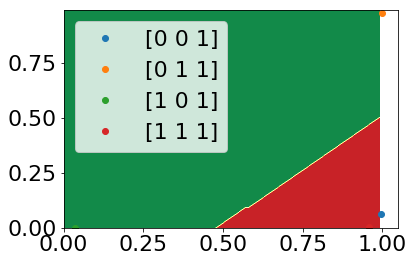

In [136]:
# plot decision surface in projected space.
plt.figure()
for xi in np.array([[0,0,1], [0,1,1], [1,0,1], [1,1,1]]):
    p0, p1 = projection(xi, h0, h1)
    plt.plot(p0, p1, 'o', label=str(xi))
plt.legend(loc='upper left')
plot_decision_surface(outclf)
plt.show()

### image sources
- <http://cs-alb-pc3.massey.ac.nz/notes/59302/l10.html>
- <http://www.deeplearningbook.org/contents/mlp.html>

In [6]:
from IPython.core.display import HTML
HTML(open('../custom.css').read())